# Analytique de l'apprentissage

## Visualisation, manipulation de données & statistiques descriptives

Carnet web IPython (Jupyter Notebook) en complément du **«Chapitre 6 – Vers une IENA pilotée par les données » ** du livre : **« Vers une nouvelle ingénierie des environnements numériques d’apprentissage »**, auteurs du chapitre, Claude Coulombe & Valéry Psyché, éditeurs: Josiane Basque, Gilbert Paquette, licence code source libre Apache

### Utilisation des bibliothèques Python Pandas (manipulation des données) et matplotlib (affichage graphique)

In [543]:
# -*- coding: utf-8 -*-

import pandas as pd
from matplotlib import pyplot as plt

## Visualisation simple du genre des participants - Ulibre IHPQ

In [589]:
path_to_datafile = "AA_data/"

### Lecture et chargement des données

Retourne un Dataframe ou tableau de données analogue à une feuille de tableur où chaque ligne représente un exemplaire de données (observations ou exemples) et chaque colonne représente la valeur d'un attribut (ou caractéristique). 

### Types d'attributs

Sur le plan du type d’attributs, on distingue plusieurs types selon les valeurs qui les caractérisent. En gros, on distinguera entre les attributs discrets et les attributs continus. Une autre distinction utile sépare les attributs entre les attributs numériques avec des sous-types valeurs entières (valeurs discrètes) et valeurs réelles (valeurs continues), et les attributs catégoriels qui sont des symboles appartenant à un ensemble (valeurs discrètes). 
<ul>
<li>Valeurs continues</li><br>
<ul>
<li>Par exemple, la température, le poids ou la taille d'une personne (des attributs continus) seront exprimés par un nombre en virgule flottante. 
</li>
<li>
Pour les besoins des algorithmes d’apprentissage automatique, les attributs numériques continus sont généralement convertis et normalisés en un nombre flottant entre 0.0 et 1.0
</li>
<li>Pour les besoins des algorithmes d’apprentissage automatique, les attributs continus sont généralement convertis et normalisés en un nombre flottant entre 0 et 1.</li>
</ul><br>
<li>Valeurs discrètes</li><br>
<ul>
<li>Typiquement avec un ensemble précis et limité de cas possibles ou catégories (attributs catégoriels). Comme une valeur booléenne (vrai ou faux), le genre d'une personne (femme, homme), la couleur d'une voiture (noir, blanc, gris, bleu, vert, rouge, beige, ...), la réponse à une question à choix multiple. Même un texte peut être ramené à l'ensemble des mots qu'il contient.</li>
<li>
Quelques exemples en éducation: les différentes réponses à une question à choix multiple, l’attribut niveau d’éducation sera décrit par une valeur dans l’ensemble de symboles: ‘primaire’, ‘secondaire’, ‘collégial’, ‘bac’, ‘maîtrise’, ‘doctorat’, ou le niveau de compétence un symbole appartenant à l’ensemble: ‘novice’, ‘débutant’, ‘intermédiaire’, ‘avancé’, ‘expert’. Les notes et résultats peuvent être traités comme des ensembles discrets ou continus selon le cas.  
</li>
<li>
Les différentes valeurs discrètes seront converties en une série d'attributs binaires (0,1) ou bits, à raison d'un bit par choix d'attribut. Note: Sauf pour le cas dégénéré à deux choix (i.e. attribut booléen) où un seul bit suffit.
</li>
</ul>
</ul>
<br/>

In [545]:
IHPQ_Profil_Q1_DF = pd.read_csv(path_to_datafile+"IHPQ_profil_Q1_rep.csv", 
                                delimiter=",",
                                na_values=[""],
                                encoding='utf-8')

### Afficher le début du tableau de données

In [546]:
IHPQ_Profil_Q1_DF.head()

,student_id,sexe
0,3320,NaN
1,13,femme
2,3985,NaN
3,4746,femme
4,3977,homme


### Renommer un attribut (colonne) du tableau de données

In [547]:
IHPQ_Profil_Q1_DF.rename(columns={'sexe':'genre'}, inplace=True)
IHPQ_Profil_Q1_DF.head()

,student_id,genre
0,3320,NaN
1,13,femme
2,3985,NaN
3,4746,femme
4,3977,homme


### Statistiques primaires - compte / fréquence
#### Afficher le nombre d'exemplaires de données (lignes dans le tableau de données)

In [548]:
print(len(IHPQ_Profil_Q1_DF))

1847


#### Accès à la valeur d'un attribut d'un exemplaire particulier de données

In [549]:
print(list(IHPQ_Profil_Q1_DF[IHPQ_Profil_Q1_DF['student_id'] == 13]['genre'])[0])

femme


#### Compte en regroupant par attribut (colonne)

In [550]:
IHPQ_Profil_Q1_DF.groupby("genre").size()

genre
femme    858
homme    710
dtype: int64

## Visualisation

### Tarte / camembert de la distribution des valeurs d'un attribut

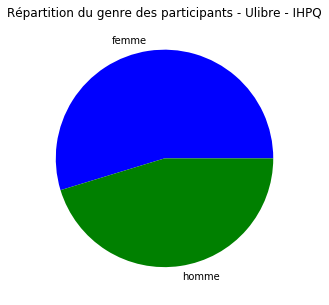

In [551]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
(IHPQ_Profil_Q1_DF.groupby('genre').size()).plot(kind='pie', colors=['b','g'],title=u"Répartition du genre des participants - Ulibre - IHPQ")
plt.ylabel("") # to remove None label on y-axis
plt.show()

### Histogramme vertical de la distribution des valeurs d'un attribut

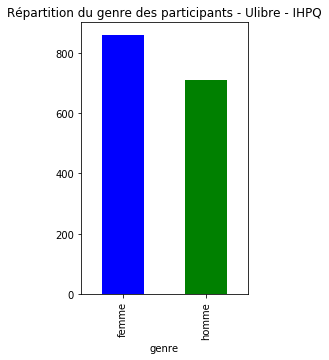

In [552]:
from matplotlib import pyplot as plt
plt.figure(figsize=(3, 5))
(IHPQ_Profil_Q1_DF.groupby('genre').size()).plot(kind='bar', color=['b','g'], title=u"Répartition du genre des participants - Ulibre - IHPQ")
plt.show()

### Histogramme horizontal de la distribution des valeurs d'un attribut

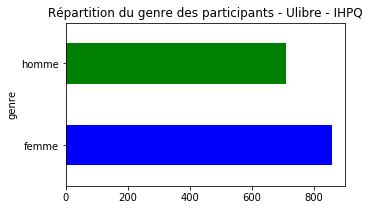

In [553]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 3))
(IHPQ_Profil_Q1_DF.groupby('genre').size()).plot(kind='barh', color=['b','g'], title=u"Répartition du genre des participants - Ulibre - IHPQ")
plt.show()

## Visualisation de la répartition des occupations des participants 

### Lecture et chargement des données

In [554]:
IHPQ_Profil_Q7_DF = pd.read_csv(path_to_datafile+"IHPQ_profil_Q7_Brut.csv", 
                                delimiter=",",
                                na_values=[""],
                                encoding='utf-8')
pd.options.display.max_colwidth = 1000
IHPQ_Profil_Q7_DF.head()

,student_id,module_id,state
0,3320,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}"
1,13,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": false, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis employ\u00e9(e) \u00e0 plein temps""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}"
2,3985,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}"
3,4746,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis \u00e0 la retraite""}}"
4,3977,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis employ\u00e9(e) \u00e0 plein temps""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}"


### Modification / uniformisation des données avec une expression régulière (caractères accentués)

In [555]:
IHPQ_Profil_Q7_DF['state'] = IHPQ_Profil_Q7_DF['state'].apply(lambda text: text.replace("\\/", "/").encode().decode('unicode_escape')  if type(text) is str  else text)
IHPQ_Profil_Q7_DF.head()

,student_id,module_id,state
0,3320,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}"
1,13,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": false, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis employé(e) à plein temps""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}"
2,3985,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}"
3,4746,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis à la retraite""}}"
4,3977,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis employé(e) à plein temps""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}"


### Extraction d'un attribut au moyen d'une expression régulière

In [556]:
IHPQ_Profil_Q7_DF['occupation'] = IHPQ_Profil_Q7_DF['state'].str.extract('\":\s*\"([A-Za-ü\s*\-\.\(\)\s*]*)\"')
IHPQ_Profil_Q7_DF.head()

,student_id,module_id,state,occupation
0,3320,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}",NaN
1,13,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": false, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis employé(e) à plein temps""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}",Je suis employé(e) à plein temps
2,3985,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}",NaN
3,4746,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis à la retraite""}}",Je suis à la retraite
4,3977,i4x://TELUQ/TUL2/problem/a03a58c4c68342d18a4c01a2497c840a,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": ""Je suis employé(e) à plein temps""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-a03a58c4c68342d18a4c01a2497c840a_2_1"": {}}}",Je suis employé(e) à plein temps


#### Compte en regroupant par attribut (colonne)

In [557]:
IHPQ_Profil_Q7_DF.groupby('occupation').size()

occupation
Autre situation                        55
Je suis au chômage                     47
Je suis employé(e) à plein temps      682
Je suis employé(e) à temps partiel    110
Je suis à la retraite                 340
Je suis étudiant(e)                   120
dtype: int64

### Tarte / camembert

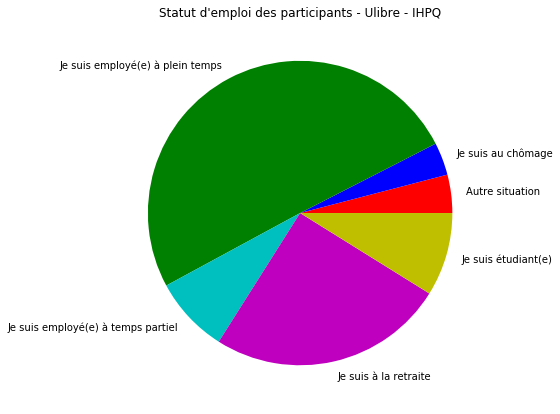

In [558]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
IHPQ_Profil_Q7_DF.groupby('occupation').size().plot(kind='pie', colors=['r','b','g','c','m','y'], title=u"Statut d'emploi des participants - Ulibre - IHPQ")
plt.ylabel("") # to remove None label on y-axis
plt.show()

### Histogramme vertical

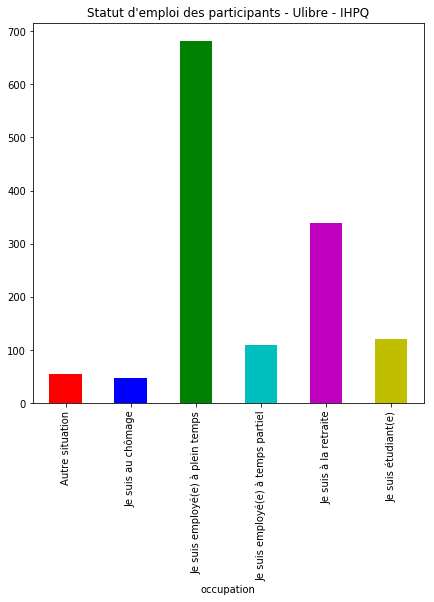

In [559]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
IHPQ_Profil_Q7_DF.groupby('occupation').size().plot(kind='bar',color=['r','b','g','c','m','y'],title=u"Statut d'emploi des participants - Ulibre - IHPQ")
plt.ylabel("") # to remove None label on y-axis
plt.show()

### Histogramme horizontal

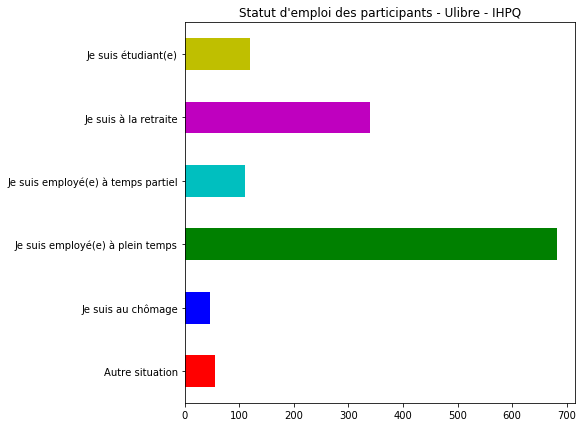

In [560]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
IHPQ_Profil_Q7_DF.groupby('occupation').size().plot(kind='barh',color=['r','b','g','c','m','y'],title=u"Statut d'emploi des participants - Ulibre - IHPQ")
plt.ylabel("") # to remove None label on y-axis
plt.show()

## Visualisation de la répartition de l'âge des apprenants - Ulibre CTF

### Lecture et chargement des données

In [561]:
CTF_Profil_Q2_DF = pd.read_csv(path_to_datafile+"CTF_profil_Q2_Brut.csv", 
                                delimiter=",",
                                na_values=[""],
                                encoding='utf-8')

pd.options.display.max_colwidth = 1000
CTF_Profil_Q2_DF.head()

,student_id,module_id,state
0,3320,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1967""}}"
1,4892,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1977""}, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}}"
2,4003,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1965""}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}}"
3,3012,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1972""}, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}}"
4,4585,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1983""}}"


### Extraction d'un attribut au moyen d'une expression régulière

In [562]:
CTF_Profil_Q2_DF['âge'] = CTF_Profil_Q2_DF['state'].str.extract('\":\s*\"([\d]*)\"')
CTF_Profil_Q2_DF['âge'] = CTF_Profil_Q2_DF['âge'].apply(lambda annee: 2014-int(annee) if type(annee) is str else annee)
CTF_Profil_Q2_DF.head()

,student_id,module_id,state,âge
0,3320,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1967""}}",47.0
1,4892,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1977""}, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}}",37.0
2,4003,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1965""}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}}",49.0
3,3012,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1972""}, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}}",42.0
4,4585,i4x://TELUQ/TUL1/problem/c94805eb35f44a1da6ac872a65183ecb,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL1-problem-c94805eb35f44a1da6ac872a65183ecb_2_1"": ""1983""}}",31.0


### Statistiques descriptives usuelles - moyenne, médiane, écart-type et variance

In [563]:
CTF_Profil_Q2_DF.describe()

,student_id,âge
count,1271.000000,1046.000000
mean,3050.153423,37.827916
std,1693.719044,9.739921
min,5.000000,18.000000
25%,1588.000000,31.000000
50%,3012.000000,36.000000
75%,4453.500000,43.000000
max,6208.000000,100.000000


In [564]:
print("L'âge moyen =",'{:,.2f}'.format(CTF_Profil_Q2_DF['âge'].mean()))
print("L'âge median =",'{:,.2f}'.format(CTF_Profil_Q2_DF['âge'].median()))
print("L'écart-type de l'âge =",'{:,.2f}'.format(CTF_Profil_Q2_DF['âge'].std()))
print("La variance de l'âge =",'{:,.2f}'.format(CTF_Profil_Q2_DF['âge'].var()))

L'âge moyen = 37.83
L'âge median = 36.00
L'écart-type de l'âge = 9.74
La variance de l'âge = 94.87


### Affichage d'un histogramme de la distribution de l'âge - Ulibre CTF

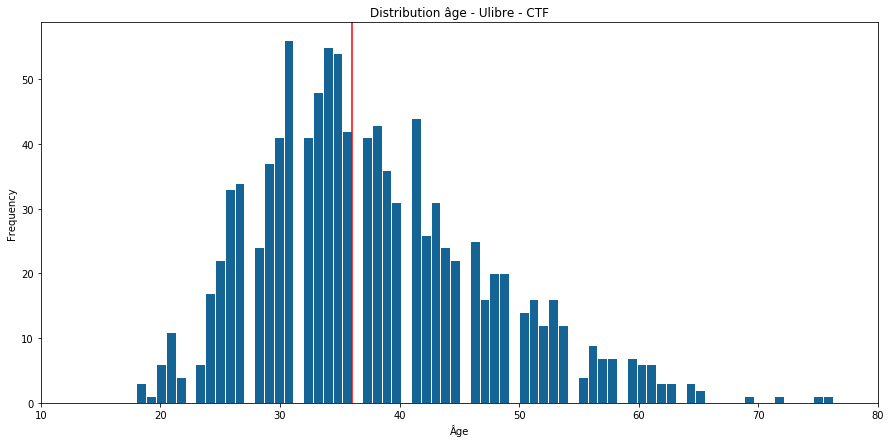

In [565]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
# Restreindre l'affichage pour retirer 
# une donnée aberrante à 100 ans
axes = plt.axes()
axes.set_xlim([10, 80])
plt.xlabel("Âge")
plt.ylabel("Fréquence")

CTF_Profil_Q2_DF['âge'].plot(kind='hist',
                             edgecolor='white', linewidth=1.0,
                             bins=100, 
                             title=u'Distribution âge - Ulibre - CTF', 
                             color='#146496') 
plt.axvline(36, color='red')
plt.show()

## Visualisation de la répartition de l'âge des apprenants - Ulibre IHPQ

### Lecture et chargement des données

In [566]:
IHPQ_Profil_Q2_DF = pd.read_csv(path_to_datafile+"IHPQ_profil_Q2_Brut.csv", 
                                delimiter=",",
                                na_values=[""],
                                encoding='utf-8')
pd.options.display.max_colwidth = 1000
IHPQ_Profil_Q2_DF.head()

,student_id,module_id,state
0,3320,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}}"
1,13,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": ""1956""}}"
2,3985,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}}"
3,4746,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": ""1946""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}}"
4,3977,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": ""1988""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}}"


### Extraction d'un attribut au moyen d'une expression régulière

In [567]:
IHPQ_Profil_Q2_DF['âge'] = IHPQ_Profil_Q2_DF['state'].str.extract('\":\s*\"([\d]*)\"')
IHPQ_Profil_Q2_DF['âge'] = IHPQ_Profil_Q2_DF['âge'].apply(lambda annee: 2014-int(annee) if type(annee) is str else annee)
IHPQ_Profil_Q2_DF.head()

,student_id,module_id,state,âge
0,3320,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}}",NaN
1,13,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": ""1956""}}",58.0
2,3985,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""seed"": 1, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}}",NaN
3,4746,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": ""1946""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}}",68.0
4,3977,i4x://TELUQ/TUL2/problem/464f8758b5c74dbfb3a20e3a54f99a37,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": ""1988""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-464f8758b5c74dbfb3a20e3a54f99a37_2_1"": {}}}",26.0


### Statistiques descriptives usuelles - moyenne, médiane, écart-type et variance

In [568]:
IHPQ_Profil_Q2_DF.describe()

,student_id,âge
count,1848.000000,1546.000000
mean,3361.603896,46.046572
std,1734.801308,15.347973
min,5.000000,12.000000
25%,1877.750000,33.000000
50%,3451.000000,46.000000
75%,4903.250000,60.000000
max,6255.000000,84.000000


In [569]:
print("L'âge moyen =",'{:,.2f}'.format(IHPQ_Profil_Q2_DF['âge'].mean()))
print("L'âge median =",'{:,.2f}'.format(IHPQ_Profil_Q2_DF['âge'].median()))
print("L'écart-type de l'âge =",'{:,.2f}'.format(IHPQ_Profil_Q2_DF['âge'].std()))
print("La variance de l'âge =",'{:,.2f}'.format(IHPQ_Profil_Q2_DF['âge'].var()))

L'âge moyen = 46.05
L'âge median = 46.00
L'écart-type de l'âge = 15.35
La variance de l'âge = 235.56


### Affichage d'un histogramme de la distribution de l'âge - Ulibre IHPQ

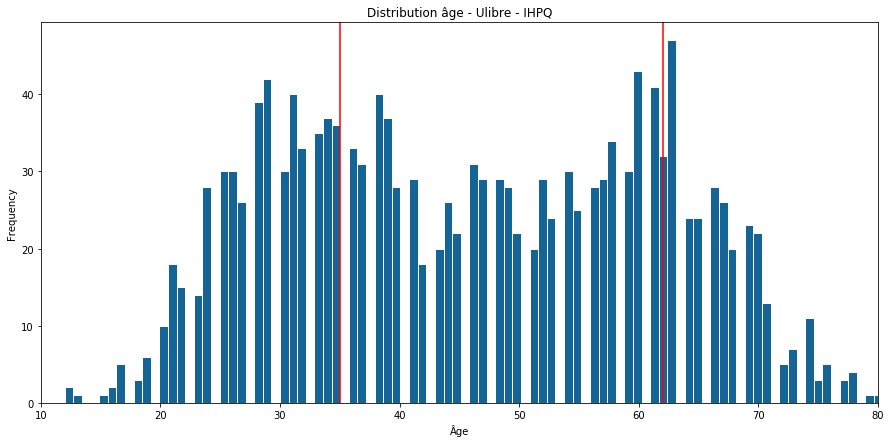

In [570]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
# Restreindre l'affichage pour retirer 
# une donnée aberrante à 100 ans
axes = plt.axes()
axes.set_xlim([10, 80])
plt.xlabel("Âge")
plt.ylabel("Fréquence")

IHPQ_Profil_Q2_DF['âge'].plot(kind='hist',
                              edgecolor='white', linewidth=1.0,
                              bins=100, 
                              title=u'Distribution âge - Ulibre - IHPQ', 
                              color='#146496') 
plt.axvline(35, color='red')
plt.axvline(62, color='red')
plt.show()

### Note: On distingue deux populations! Une d'âge moyen d'environ 35 ans et une autre autour de 65 ans.

## Visualisation de la répartition géographique des participants sur une mappemonde

### Installation de la bibliothèque pygal

https://buildmedia.readthedocs.org/media/pdf/pygal/latest/pygal.pdf

In [571]:
! pip3 install pygal_maps_world

You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Lecture et chargement des données

In [572]:
IHPQ_Profil_Q3_DF = pd.read_csv(path_to_datafile+"IHPQ_Profil_Q3_Brut.csv", 
                                delimiter=",",
                                na_values=[""],
                                encoding='utf-8')
pd.options.display.max_colwidth = 1000
IHPQ_Profil_Q3_DF.head()

,student_id,module_id,state
0,13,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Canada - Qc""}}"
1,4818,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Ha\u00efti""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}}"
2,3535,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""\u00c9tats-Unis""}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}}"
3,1044,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""France""}}"
4,3977,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Canada - Qc""}}"


### Modification / uniformisation des données avec une expression régulière (caractères accentués)

In [573]:
IHPQ_Profil_Q3_DF['state'] = IHPQ_Profil_Q3_DF['state'].apply(lambda text: text.replace("\\/", "/").encode().decode('unicode_escape')  if type(text) is str  else text)
IHPQ_Profil_Q3_DF.head()

,student_id,module_id,state
0,13,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Canada - Qc""}}"
1,4818,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Haïti""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}}"
2,3535,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""États-Unis""}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}}"
3,1044,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""France""}}"
4,3977,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Canada - Qc""}}"


### Extraction d'un attribut au moyen d'une expression régulière

In [574]:
IHPQ_Profil_Q3_DF['pays'] = IHPQ_Profil_Q3_DF['state'].str.extract('\":\s*\"([A-Za-ü\s*\-\.\s*]*)\"')
IHPQ_Profil_Q3_DF.head()

,student_id,module_id,state,pays
0,13,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Canada - Qc""}}",Canada - Qc
1,4818,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Haïti""}, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}}",Haïti
2,3535,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""États-Unis""}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}}",États-Unis
3,1044,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""France""}}",France
4,3977,i4x://TELUQ/TUL2/problem/0704643ff2e943dbae4bffcae0bb7d82,"{""correct_map"": {}, ""seed"": 1, ""done"": null, ""input_state"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": {}}, ""student_answers"": {""i4x-TELUQ-TUL2-problem-0704643ff2e943dbae4bffcae0bb7d82_2_1"": ""Canada - Qc""}}",Canada - Qc


### Compte en regroupant par attribut (colonne)

Regrouper les participants selon l'attribut 'pays'

In [575]:
IHPQ_Profil_Q3_DF.groupby("pays").size()

pays
Algérie                         6
Allemagne                       1
Australie                       2
Belgique                       16
Brésil                          2
Burkina                         1
Bénin                           1
Cameroun                        2
Canada - Alb.                   2
Canada - C.-B.                  4
Canada - Ont.                  20
Canada - Qc                  1273
Colombie                       11
Congo                           1
Croatie                         1
Espagne                         6
France                        108
Gabon                           2
Guinée                          4
Haïti                          15
Inde                            1
Italie                          2
Liban                           2
Luxembourg                      1
Mali                            1
Maroc                           6
Maurice                         1
Mexique                         3
Niger                           1
Nigeria  

### Modification / uniformisation des données en fusionnant des valeurs

In [576]:
IHPQ_Profil_Q3_DF.loc[IHPQ_Profil_Q3_DF['pays'] == 'Canada - Qc','pays'] = 'Canada'
IHPQ_Profil_Q3_DF.loc[IHPQ_Profil_Q3_DF['pays'] == 'Canada - Ont.','pays'] = 'Canada'
IHPQ_Profil_Q3_DF.loc[IHPQ_Profil_Q3_DF['pays'] == 'Canada - C.-B.','pays'] = 'Canada'
IHPQ_Profil_Q3_DF.loc[IHPQ_Profil_Q3_DF['pays'] == 'Canada - Alb.','pays'] = 'Canada'

In [577]:
IHPQ_Profil_Q3_DF.groupby("pays").size()

pays
Algérie                         6
Allemagne                       1
Australie                       2
Belgique                       16
Brésil                          2
Burkina                         1
Bénin                           1
Cameroun                        2
Canada                       1299
Colombie                       11
Congo                           1
Croatie                         1
Espagne                         6
France                        108
Gabon                           2
Guinée                          4
Haïti                          15
Inde                            1
Italie                          2
Liban                           2
Luxembourg                      1
Mali                            1
Maroc                           6
Maurice                         1
Mexique                         3
Niger                           1
Nigeria                         1
Norvège                         1
Pakistan                        1
Roumanie 

## Statistiques primaires - compte / fréquence
### Afficher le nombre d'exemplaires de données (lignes dans le tableau de données)
#### le nombre de participants du cours Ulibre IHPQ

In [578]:
print(len(IHPQ_Profil_Q3_DF.groupby("student_id")))
print(len(IHPQ_Profil_Q3_DF))

1848
1848


#### le nombre de pays d'origine des participants

In [579]:
len(IHPQ_Profil_Q3_DF.groupby("pays"))

41

### Création d'un nouvel attribut (colonne) contenant le nombre de participants originaire d'un pays

In [580]:
IHPQ_Profil_Q3_agg_DF=IHPQ_Profil_Q3_DF.groupby("pays").size().to_frame('nbr').reset_index()
IHPQ_Profil_Q3_agg_DF.head()

,pays,nbr
0,Algérie,6
1,Allemagne,1
2,Australie,2
3,Belgique,16
4,Brésil,2


### Création d'un nouvel attribut (colonne) contenant le pourcentage de participants originaire d'un pays

In [581]:
IHPQ_Profil_Q3_agg_DF['pourcent']=IHPQ_Profil_Q3_agg_DF['nbr']/IHPQ_Profil_Q3_agg_DF['nbr'].sum()*100
IHPQ_Profil_Q3_agg_DF.head()

,pays,nbr,pourcent
0,Algérie,6,0.392670
1,Allemagne,1,0.065445
2,Australie,2,0.130890
3,Belgique,16,1.047120
4,Brésil,2,0.130890


### Tri alphabétique normalisé sur le nom des pays

In [582]:
IHPQ_Profil_Q3_agg_DF = IHPQ_Profil_Q3_agg_DF.iloc[IHPQ_Profil_Q3_agg_DF['pays'].str.normalize('NFKD').argsort()]
print(IHPQ_Profil_Q3_agg_DF)

                         pays   nbr   pourcent
0                     Algérie     6   0.392670
1                   Allemagne     1   0.065445
2                   Australie     2   0.130890
3                    Belgique    16   1.047120
6                       Bénin     1   0.065445
4                      Brésil     2   0.130890
5                     Burkina     1   0.065445
7                    Cameroun     2   0.130890
8                      Canada  1299  85.013089
9                    Colombie    11   0.719895
10                      Congo     1   0.065445
11                    Croatie     1   0.065445
12                    Espagne     6   0.392670
39        Émirats arabes unis     1   0.065445
40                 États-Unis    12   0.785340
13                     France   108   7.068063
14                      Gabon     2   0.130890
15                     Guinée     4   0.261780
16                      Haïti    15   0.981675
17                       Inde     1   0.065445
18           

### Création d'une table de conversion nom de pays / code de pays

La composante d'affichage de mappemonde pygal.maps.world.World() utilise le code pays. Il faut donc créer une table de conversion entre le nom du pays et son code. Les codes sont dans les pages 20 à 23 de lq documentation de pygal https://buildmedia.readthedocs.org/media/pdf/pygal/latest/pygal.pdf 

In [583]:
conversion_nom_code_pays = { 
    'Algérie':'dz','Allemagne':'de','Australie':'au','Belgique':'be','Bénin':'bj',\
    'Brésil':'br','Burkina':'bf','Cameroun':'cm','Canada':'ca','Colombie':'co',\
    'Congo':'cg','Croatie':'hr','Espagne':'es','Émirats arabes unis':'ae',\
    'États-Unis':'us','France':'fr','Gabon':'ga','Guinée':'gn','Haïti':'ht',\
    'Inde':'in','Italie':'it','Liban':'lb','Luxembourg':'lu','Mali':'ml',\
    'Maroc':'ma','Maurice':'mu','Mexique':'mx','Niger':'ne','Nigeria':'ng',\
    'Norvège':'no','Pakistan':'pk','Québec':'qc','République centrafricaine':'cf',\
    'Roumanie':'ro','Royaume-Uni':'gb','Russie':'ru','Sénégal':'sn','Suisse':'ch',\
    'Tchad':'td','Togo':'tg','Tunisie':'tn','Vénézuéla':'ve'
}    

### Création d'un nouvel attribut (colonne) contenant le code_pays

In [584]:
IHPQ_Profil_Q3_agg_DF.insert(loc=1, column='code_pays', value=IHPQ_Profil_Q3_agg_DF['pays'].apply(lambda pays: conversion_nom_code_pays[pays]))
IHPQ_Profil_Q3_agg_DF.head()

,pays,code_pays,nbr,pourcent
0,Algérie,dz,6,0.392670
1,Allemagne,de,1,0.065445
2,Australie,au,2,0.130890
3,Belgique,be,16,1.047120
6,Bénin,bj,1,0.065445


### Création d'un gabarit HTML destiné à contenir le composant d'affichage de la mappemonde 

https://stackoverflow.com/questions/57735251/how-to-plot-data-on-a-world-map-in-a-jupyter-ipython-notebook-using-pygal-libr/

In [585]:
from IPython.display import display, HTML
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {mappemonde_rendu}
    </figure>
  </body>
</html>
"""

## Affichage d'une carte du monde de l'origine géographique des participants - Ulibre IHPQ

https://stackoverflow.com/questions/57735251/how-to-plot-data-on-a-world-map-in-a-jupyter-ipython-notebook-using-pygal-libr/

https://buildmedia.readthedocs.org/media/pdf/pygal/latest/pygal.pdf page 18


In [586]:
import pygal

dict_code_pays_nbr = pd.Series(IHPQ_Profil_Q3_agg_DF['nbr'].values,index=IHPQ_Profil_Q3_agg_DF['code_pays']).to_dict()

import pygal 
mappemonde = pygal.maps.world.World()
mappemonde.title = 'Origine géographique des participants - Ulibre - IHPQ'
mappemonde.add('',dict_code_pays_nbr)

display(HTML(base_html.format(mappemonde_rendu=mappemonde.render(is_unicode=True))))

### Ajout de plus de niveaux d'intensité

In [587]:
IHPQ_Profil_Q3_agg_DF.insert(loc=3, column='log_nbr', value=np.log10(IHPQ_Profil_Q3_agg_DF['nbr']))
IHPQ_Profil_Q3_agg_DF.head()

,pays,code_pays,nbr,log_nbr,pourcent
0,Algérie,dz,6,0.778151,0.392670
1,Allemagne,de,1,0.000000,0.065445
2,Australie,au,2,0.301030,0.130890
3,Belgique,be,16,1.204120,1.047120
6,Bénin,bj,1,0.000000,0.065445


In [588]:
import pygal

dict_code_pays_nbr = pd.Series(IHPQ_Profil_Q3_agg_DF['log_nbr'].values,index=IHPQ_Profil_Q3_agg_DF['code_pays']).to_dict()

mappemonde = pygal.maps.world.World()
mappemonde.title = 'Origine géographique des participants - Ulibre - IHPQ'
mappemonde.add('',dict_code_pays_nbr)

display(HTML(base_html.format(mappemonde_rendu=mappemonde.render(is_unicode=True))))

## Ressources utiles

1) StackOverflow - https://stackoverflow.com

2) Pandas -https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

3) Expressions régulières - http://regex101.com/ - https://www.regular-expressions.info/tutorial.html

4) Matplotlib - https://matplotlib.org/3.1.1/tutorials/index.html

